In [29]:
import pandas as pd
import numpy as np
import googletrans
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data=pd.read_csv("amazon.csv")

In [31]:
data.shape

(6454, 5)

In [32]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [33]:
data.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2002-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [34]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [35]:
data=data.replace(0, np.nan)

In [36]:
data=data.dropna(subset=['number'])

In [37]:
data.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,119.740290,NaN
std,5.649076,NaN,NaN,197.199644,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,6.000000,NaN
50%,2008.000000,NaN,NaN,33.000000,NaN
75%,2013.000000,NaN,NaN,131.000000,NaN


In [38]:
forest_fire_per_month=data.groupby('month')['number'].sum()

In [39]:
forest_fire_per_month.head()

month
Abril        28188.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30848.050
Janeiro      47747.844
Name: number, dtype: float64

In [40]:
months_unique = list(data.month.unique())

In [41]:
forest_fire_per_month=forest_fire_per_month.reindex(months_unique, axis=0)

In [42]:
forest_fire_per_month=forest_fire_per_month.to_frame()

In [43]:
forest_fire_per_month.head(4)

,number
month,
Janeiro,47747.844
Fevereiro,30848.050
Março,30717.405
Abril,28188.770


In [44]:
forest_fire_per_month.reset_index(level=0, inplace=True)

In [45]:
forest_fire_per_month.head(4)

,month,number
0,Janeiro,47747.844
1,Fevereiro,30848.050
2,Março,30717.405
3,Abril,28188.770


In [49]:
translator=googletrans.Translator()

In [50]:
for month in months_unique: 
    detected = translator.detect(month)     
    translated = translator.translate(month)     
    print(detected)     
    print(translated)     
    print("...")

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=March, pronunciation=March, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
...
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.37796605)
Translated(src=es, dest=en, text=August, pronunciation

In [52]:
translator2 = googletrans.Translator() 
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)  
    month1 = translated.text    
    forest_fire_per_month.at[i, 'month'] = month1

In [53]:
print(forest_fire_per_month)

        month     number
0     Janeiro  47747.844
1    February  30848.050
2       March  30717.405
3       April  28188.770
4         May  34731.363
5        June  56010.675
6        July  92326.113
7      August  88050.435
8   September  58578.305
9     October  88681.579
10   November  85508.054
11   December  57535.480


[None, None, None, None, None, None, None, None, None, None, None, None]

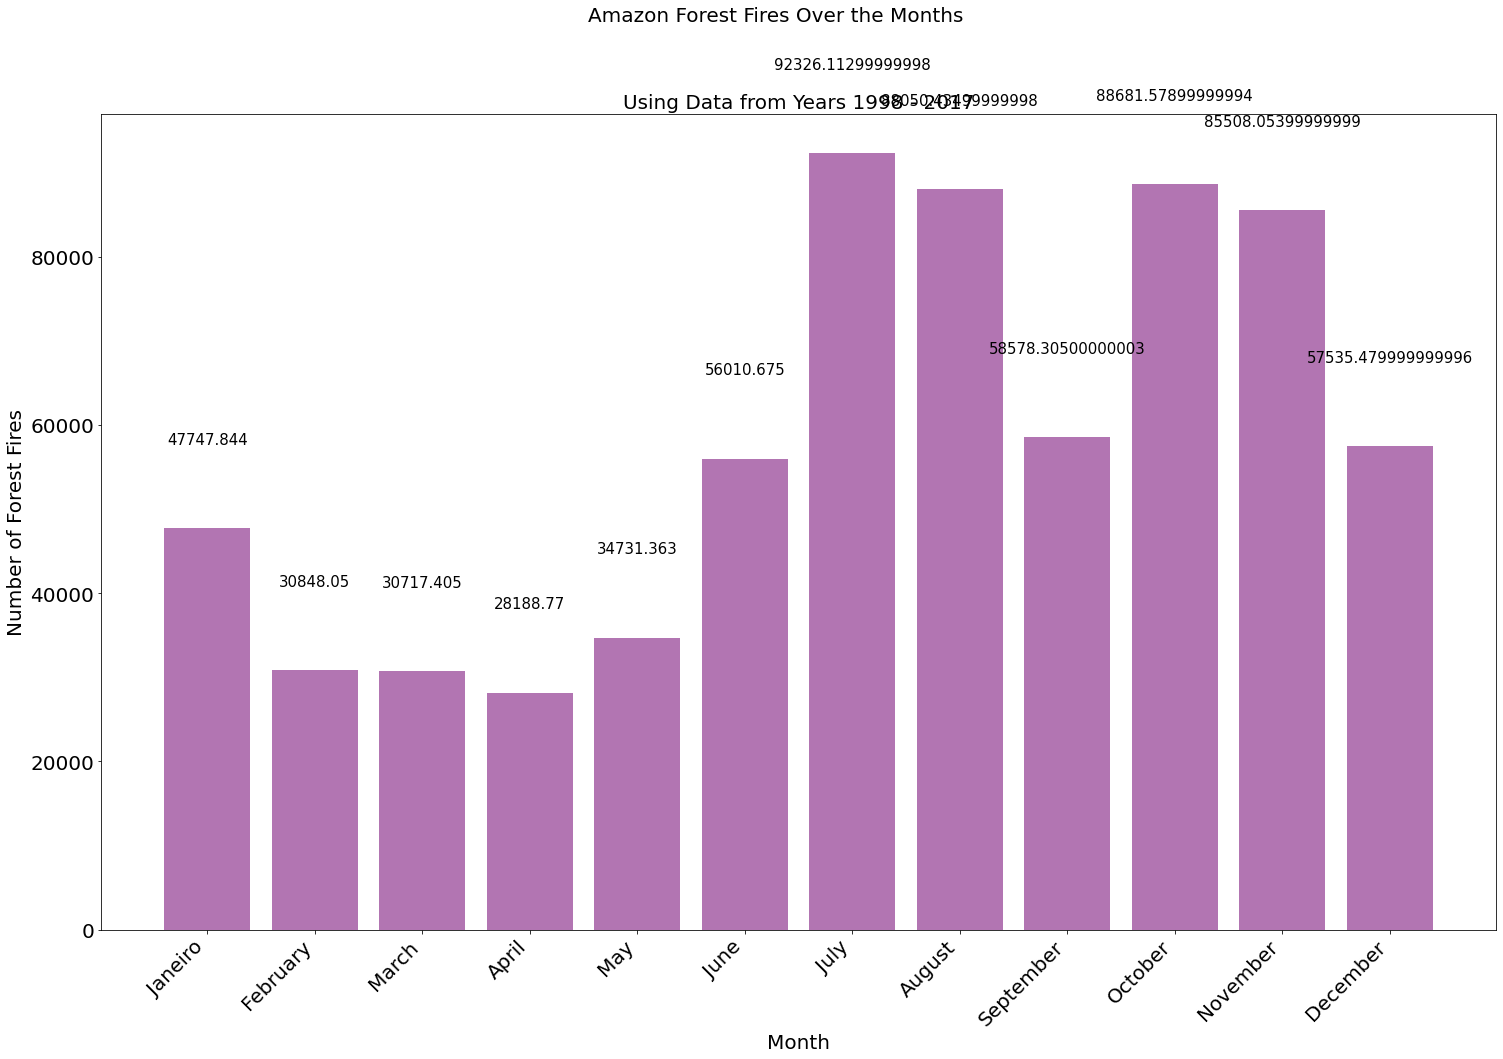

In [55]:
plt.figure(figsize=(25, 15)) #specify width and height #plt.bar(x-values, y-values) 
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) #use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   #plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)